In [14]:
import ROOT as r
import numpy as np
import math

In [4]:
mcfiles = [
    {'name':'ZZto4mu'   ,'color':r.kRed,'f':'./samples/ZZTo4mu_skim.root','Nevents':1499064,'xsec':7.6865000E-02 },    
    {'name':'ZZto4e'    ,'color':r.kBlue,'f':'./samples/ZZTo4e_skim.root','Nevents':1499093,'xsec':7.7241300E-02 },
    {'name':'ZZto2e2mu' ,'color':r.kGreen,'f':'./samples/ZZTo2e2mu_skim.root','Nevents':1497445,'xsec': 1.7656500E-01 },
    {'name':'DYJetsToLL','color':r.kOrange,'f':'./samples/DYJetsToLL_skim.root','Nevents':30458871,'xsec': 2.7903452E+03 },
    {'name':'SMHiggs'   ,'color':r.kMagenta,'f':'./samples/SMHiggsToZZTo4L_skim.root','Nevents':299973,'xsec': 1.2932700E+01 },    
]
datafiles=[
    {'name':'DoubleMuBC'      ,'color':r.kBlack,'f':'./samples/Run2012BC_DoubleMuParked_skim.root','lumi':11470},
    {'name':'DoubleElectronB'  ,'color':r.kBlack,'f':'./samples/Run2012B_DoubleElectron_skim.root','lumi':4410},    
    {'name':'DoubleElectronC' ,'color':r.kBlack,'f':'./samples/Run2012C_DoubleElectron_skim.root','lumi':7060},        
]

In [5]:
h_2e2mu_Zmass_ee = r.TH1F('h_2e2mu_Zmass_ee','h_2e2mu_Zmass_ee',130,70,200)

hlist = [
    {'h':h_2e2mu_Zmass_ee, 'fill_var':"Zmass_ee"},
]

In [6]:
c = r.TCanvas('c1','c1',800,600)

In [7]:
for sample in mcfiles+datafiles:
    histograms = []
    for h_dict in hlist:
        htmp = h_dict['h'].Clone(h_dict['h'].GetName()+"_"+sample['name'])
        histograms.append({'h':htmp,'fill_var':h_dict['fill_var']})
    sample['hists']= histograms

In [9]:
datafiles

[{'color': 1L,
  'f': './samples/Run2012BC_DoubleMuParked_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7ffc3143eb10>}],
  'lumi': 11470,
  'name': 'DoubleMuBC'},
 {'color': 1L,
  'f': './samples/Run2012B_DoubleElectron_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7ffc3143f110>}],
  'lumi': 4410,
  'name': 'DoubleElectronB'},
 {'color': 1L,
  'f': './samples/Run2012C_DoubleElectron_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7ffc3143f710>}],
  'lumi': 7060,
  'name': 'DoubleElectronC'}]

In [7]:
mcfiles[0]['hists'][0]['h'].GetName()

'h_2e2mu_Zmass_ee_ZZto4mu'

In [10]:
def select_goodMuons(Muons):
    ## fill your code here
    #  
    #  Good Muons should contain the list of good muons pt/eta/phi/mass
    #     Good_Muons=[
    #         {'pt':,'eta':,'phi':,'mass':}
    #         {'pt':,'eta':,'phi':,'mass':}        
    #     ]
    GoodMuons =Muons
    return GoodMuons
def select_goodElectrons(electrons):
    Good_electrons = []
    for j in range(0,electrons['n']):
        if electrons['pt'][j]>7 and abs(electrons['eta'][j])<2.5:
            Good_electrons.append({
                'pt':electrons['pt'][j],
                'eta':electrons['eta'][j],
                'phi':electrons['phi'][j],
                'mass':electrons['mass'][j]
            })
    return Good_electrons

In [9]:
def select_2e2mu(electrons,muons):
    ## fill your code here
    return True

In [11]:
def invmass(Leptons):
    m = 0
    px = 0
    py = 0
    pz = 0
    e = 0
    for lep in Leptons:
        px += lep['pt']*math.cos(lep['phi'])
        py += lep['pt']*math.sin(lep['phi'])
        theta = 2.*math.atan(np.exp(-lep['eta'])) 
        pz += lep['pt']/math.tan(theta)
        e += np.sqrt(lep['pt']**2 + (lep['pt']/np.tan(theta))**2 + lep['mass']**2)
    
    m = np.sqrt(e**2 - px**2 - py**2 - pz**2)    
    ## OR in the massless muon limit, the formula can be more compact:
    #m  = np.sqrt(2*pt[0]*pt[1]*(np.cosh(eta[0]-eta[1])-np.cos(phi[0]-phi[1])))
    return m

In [12]:
def FillHistogram(t,histograms,weight,N=-1):
    if N==-1:
        #Process all the events by default
        nEntries = t.GetEntries()
    else:
        nEntries = N
    print('Processing %s events in the tree'%nEntries)
    for i in range(0,nEntries):
        t.GetEntry(i)
        nMuon   = t.nMuon
        mu_pt      = np.array(t.Muon_pt)          # note: this is an array
        mu_phi     = np.array(t.Muon_phi)         # note: this is an array
        mu_eta     = np.array(t.Muon_eta)         # note: this is an array 
        mu_mass    = np.array(t.Muon_mass)        # note: this is an array
        mu_isTight = np.array(t.Muon_tightId)     # note: this is an array
        mu_charge  = np.array(t.Muon_charge)      # note: this is an array
        mu_iso     = np.array(t.Muon_pfRelIso03_all)
        mu_dxy     = np.array(t.Muon_dxy)
        mu_dxyErr  = np.array(t.Muon_dxyErr)        
        mu_dz      = np.array(t.Muon_dz)        
        mu_dzErr   = np.array(t.Muon_dzErr)                
        all_muons   = {
            'n'      :nMuon,
            'pt'     :mu_pt,
            'phi'    :mu_phi,
            'eta'    :mu_eta,
            'mass'   :mu_mass,
            'isTight':mu_isTight,
            'charge' :mu_charge,
            'iso'    :mu_iso,
            'dxy'    :mu_dxy,
            'dxyErr' :mu_dxyErr,
            'dz'     :mu_dz,
            'dzErr'  :mu_dzErr,
        }
        nElectron   = t.nElectron
        el_pt       = np.array(t.Electron_pt)         
        el_phi     = np.array(t.Electron_phi)         
        el_eta     = np.array(t.Electron_eta)         
        el_mass    = np.array(t.Electron_mass)         
        el_charge  = np.array(t.Electron_charge)      
        el_iso     = np.array(t.Electron_pfRelIso03_all)
        el_dxy     = np.array(t.Electron_dxy)
        el_dxyErr  = np.array(t.Electron_dxyErr)        
        el_dz      = np.array(t.Electron_dz)        
        el_dzErr   = np.array(t.Electron_dzErr)   
        all_electrons  = {
            'n'      :nElectron,
            'pt'     :el_pt,
            'phi'    :el_phi,
            'eta'    :el_eta,
            'mass'   :el_mass,
            'charge' :el_charge,
            'iso'    :el_iso,
            'dxy'    :el_dxy,
            'dxyErr' :el_dxyErr,
            'dz'     :el_dz,
            'dzErr'  :el_dzErr,
        }
        ## collect all the quantities you need to fill here
        quantity={
            'Zmass_ee':0
        }
        goodElectrons  = select_goodElectrons(all_electrons)
        goodMuons      = select_goodMuons(all_muons)   
        
        nGoodMuons = len(goodMuons)
        nGoodElectrons = len(goodElectrons)
        
        if nGoodElectrons==2:
            quantity['Zmass_ee'] = invmass(goodElectrons)

        # Fill all your histograms at the end
        for histogram in histograms:
            histogram['h'].Fill(quantity[histogram['fill_var']],weight)
    return 

In [34]:
for sample in mcfiles+ datafiles:
    for h_dict in sample['hists']:
        h_dict['h'].Reset()

In [15]:
for sample in datafiles:
    print('Processing sample = ',sample['name'])
    tf_sample = r.TFile(sample['f'])
    sample_tree = tf_sample.Get("Events")
    
    ## Calculate weights for MC here
    FillHistogram(sample_tree,sample['hists'],weight=1.0)

('Processing sample = ', 'DoubleMuBC')
Processing 28859 events in the tree
('Processing sample = ', 'DoubleElectronB')
Processing 54023 events in the tree
('Processing sample = ', 'DoubleElectronC')
Processing 82561 events in the tree


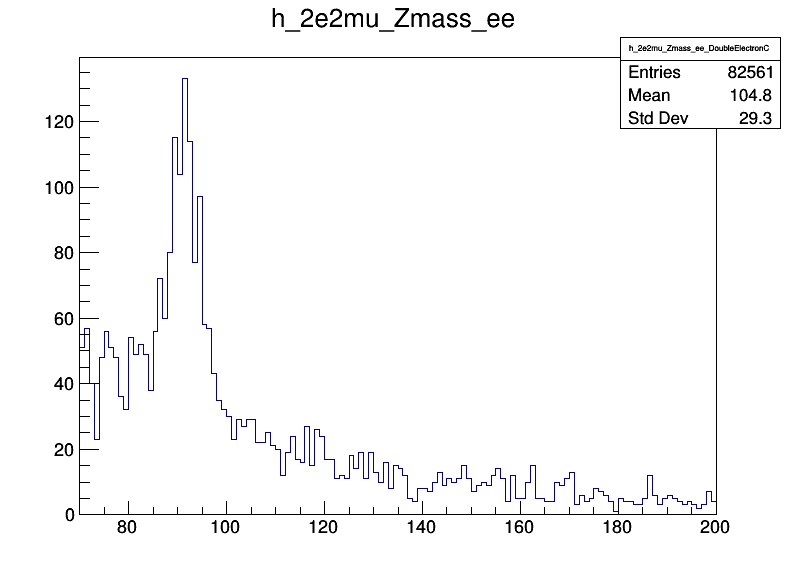

In [18]:
datafiles[2]['hists'][0]['h'].Draw()
c.Draw()

In [15]:
datafiles

[{'f': './samples/Run2012B_DoubleElectron_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7fe4d37d1730>}],
  'lumi': 4410,
  'name': 'DoubleElectronB'}]

In [40]:
mcfiles

[{'Nevents': 1499064,
  'color': 632L,
  'f': './samples/ZZTo4mu_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7f8183cbdc00>}],
  'name': 'ZZto4mu',
  'xsec': 0.076865},
 {'Nevents': 1499093,
  'color': 600L,
  'f': './samples/ZZTo4e_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7f81863e7a80>}],
  'name': 'ZZto4e',
  'xsec': 0.0772413},
 {'Nevents': 1497445,
  'color': 416L,
  'f': './samples/ZZTo2e2mu_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7f81863e8380>}],
  'name': 'ZZto2e2mu',
  'xsec': 0.176565},
 {'Nevents': 30458871,
  'color': 800L,
  'f': './samples/DYJetsToLL_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F object at 0x7f81863e8e00>}],
  'name': 'DYJetsToLL',
  'xsec': 2790.3452},
 {'Nevents': 299973,
  'color': 616L,
  'f': './samples/SMHiggsToZZTo4L_skim.root',
  'hists': [{'fill_var': 'Zmass_ee',
    'h': <cppyy.gbl.TH1F obj

h_2e2mu_Zmass_ee_DoubleMuBC
h_2e2mu_Zmass_ee_DoubleElectronB
h_2e2mu_Zmass_ee_DoubleElectronC


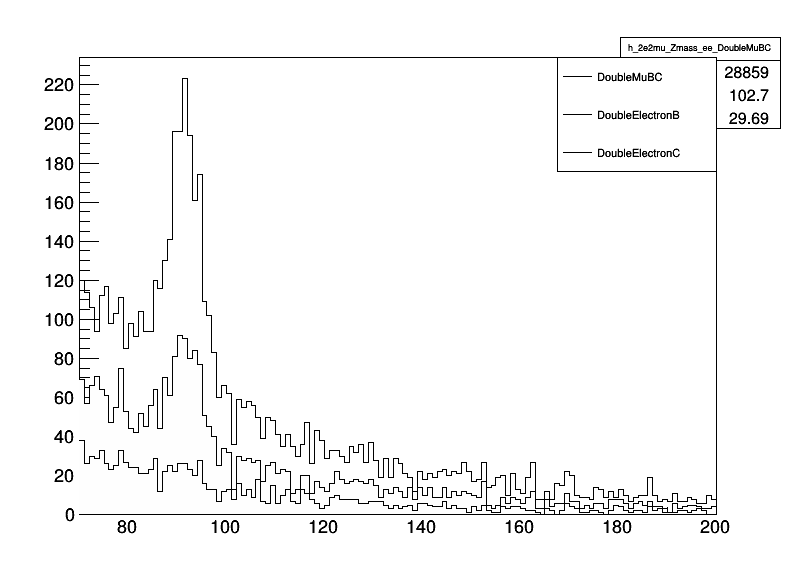

In [30]:
leg = r.TLegend(0.7,0.7,0.9,0.9)
r.gStyle.SetOptStat(0)
for i,h in enumerate(hlist):
    hStack = r.THStack(h['h'].GetName()+"_st","")
    for sample in datafiles:        
        h_sample= sample['hists'][i]['h']
        print(h_sample.GetName())
        leg.AddEntry(h_sample,sample['name'])
        h_sample.SetLineColor(sample['color'])
        h_sample.SetFillColor(0)        
#        h_sample.Draw("same")
        hStack.Add(h_sample)
#    leg.AddEntry(h['h'],"All mc")
    hStack.Draw('same hist')
leg.Draw("same")
c.Draw() 

In [20]:
def output(samples):
    outf = r.TFile.Open('Hto4l_histograms.root','RECREATE')
    for sample in samples:
        for h_dict in sample['hists']:
            h_dict['h'].Write()
    outf.Close()

In [21]:
output(datafiles)

In [24]:
f = r.TFile.Open('Hto4l_histograms.root')
f.ls()

TFile**		Hto4l_histograms.root	
 TFile*		Hto4l_histograms.root	
  KEY: TH1F	h_2e2mu_Zmass_ee_DoubleMuBC;1	h_2e2mu_Zmass_ee
  KEY: TH1F	h_2e2mu_Zmass_ee_DoubleElectronB;1	h_2e2mu_Zmass_ee
  KEY: TH1F	h_2e2mu_Zmass_ee_DoubleElectronC;1	h_2e2mu_Zmass_ee


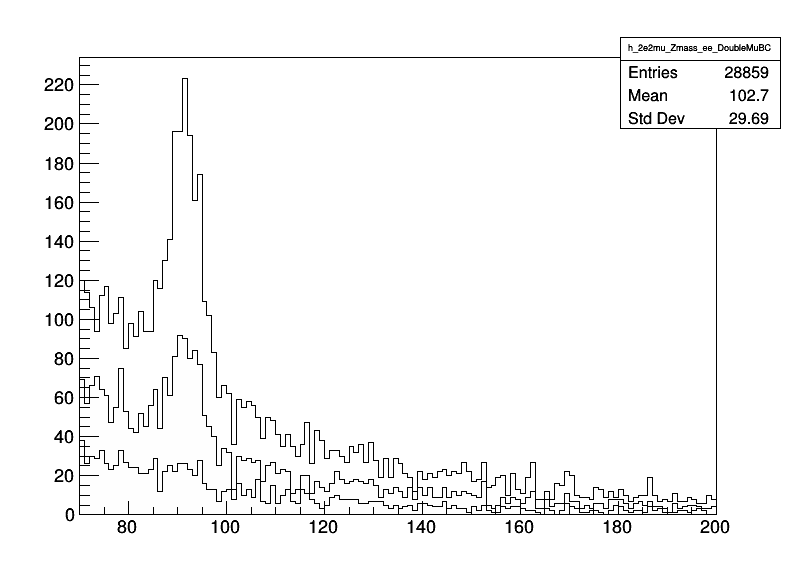

In [31]:
st = r.THStack()
st.Add(f.Get('h_2e2mu_Zmass_ee_DoubleMuBC'))
st.Add(f.Get('h_2e2mu_Zmass_ee_DoubleElectronB'))
st.Add(f.Get('h_2e2mu_Zmass_ee_DoubleElectronC'))
st.Draw()
c.Draw()